In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/NFLX.csv')
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

In [ ]:
data.columns

Index(['Date', 'Adj Close'], dtype='object')

In [ ]:
data.rename(columns = {'Adj Close':'Final_Price'},inplace = True)

In [ ]:
data

,Date,Final_Price
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1009 non-null   object 
 1   Final_Price  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date']) #converting into date time datatype

In [ ]:
data.dtypes

,0
Date,datetime64[ns]
Final_Price,float64


In [ ]:
#As our daily data is irregular, so we will be converting it to monthly data

In [ ]:
data['Month'] = data['Date'].dt.to_period('M')
data

,Date,Final_Price,Month
0,2018-02-05,254.259995,2018-02
1,2018-02-06,265.720001,2018-02
2,2018-02-07,264.559998,2018-02
3,2018-02-08,250.100006,2018-02
4,2018-02-09,249.470001,2018-02
...,...,...,...
1004,2022-01-31,427.140015,2022-01
1005,2022-02-01,457.130005,2022-02
1006,2022-02-02,429.480011,2022-02
1007,2022-02-03,405.600006,2022-02


In [ ]:
data = data.groupby('Month')['Final_Price'].mean().reset_index()
data

,Month,Final_Price
0,2018-02,272.054705
1,2018-03,312.228097
2,2018-04,307.466192
3,2018-05,331.536819
4,2018-06,384.133336
5,2018-07,381.515238
6,2018-08,346.257824
7,2018-09,362.641576
8,2018-10,335.445652
9,2018-11,290.344764


In [ ]:
data['Month'] = data['Month'].dt.to_timestamp()
data

,Month,Final_Price
0,2018-02-01,272.054705
1,2018-03-01,312.228097
2,2018-04-01,307.466192
3,2018-05-01,331.536819
4,2018-06-01,384.133336
5,2018-07-01,381.515238
6,2018-08-01,346.257824
7,2018-09-01,362.641576
8,2018-10-01,335.445652
9,2018-11-01,290.344764


In [ ]:
data.set_index('Month',inplace = True)

In [ ]:
data

,Final_Price
Month,
2018-02-01,272.054705
2018-03-01,312.228097
2018-04-01,307.466192
2018-05-01,331.536819
2018-06-01,384.133336
2018-07-01,381.515238
2018-08-01,346.257824
2018-09-01,362.641576
2018-10-01,335.445652


<Axes: xlabel='Month'>

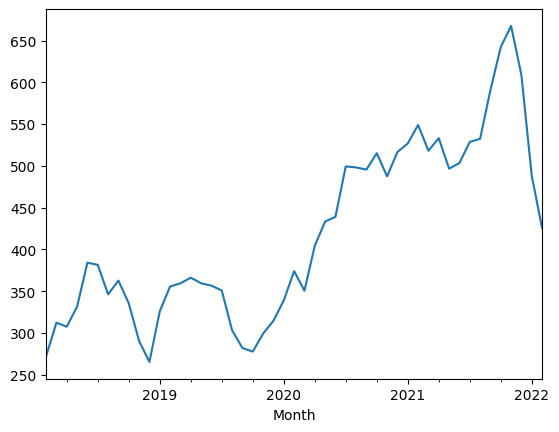

In [ ]:
data['Final_Price'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


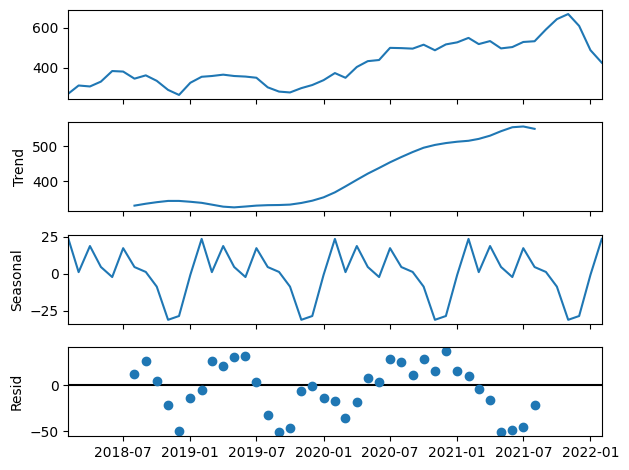

In [ ]:
decompose = seasonal_decompose(data)
print(decompose.plot())

**Check Stationarty**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(data['Final_Price'])
pv = result[1]
pv

np.float64(0.3854220410821773)

In [ ]:
# H0 = Data is not stationary
# H1 = Data is stationary

In [ ]:
if pv > 0.05:
  print('Data is not stationary') #null
else:
  print('Data is stationary') # alternate

Data is not stationary


**Make the data stationary** - Transformation

In [ ]:
df = np.log(data['Final_Price'])
df

,Final_Price
Month,
2018-02-01,5.606003
2018-03-01,5.743734
2018-04-01,5.728365
2018-05-01,5.803739
2018-06-01,5.950990
2018-07-01,5.944151
2018-08-01,5.847184
2018-09-01,5.893415
2018-10-01,5.815460


In [ ]:
df.shape

(49,)

#Rolling mean and Rolling Std

In [ ]:
rolling_mean = df.rolling(window = 3).mean()
rolling_std = df.rolling(window = 3).std()

In [ ]:
rolling_mean

,Final_Price
Month,
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,5.692701
2018-05-01,5.758613
2018-06-01,5.827698
2018-07-01,5.899626
2018-08-01,5.914108
2018-09-01,5.894916
2018-10-01,5.852020


In [ ]:
df

,Final_Price
Month,
2018-02-01,5.606003
2018-03-01,5.743734
2018-04-01,5.728365
2018-05-01,5.803739
2018-06-01,5.950990
2018-07-01,5.944151
2018-08-01,5.847184
2018-09-01,5.893415
2018-10-01,5.815460


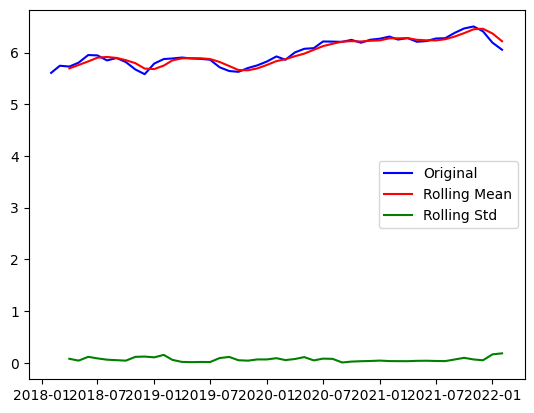

In [ ]:
plt.plot(df,color = 'blue',label = 'Original')
plt.plot(rolling_mean,color = 'red',label = 'Rolling Mean')
plt.plot(rolling_std,color = 'green',label = 'Rolling Std')
plt.legend()
plt.show()

In [ ]:
diff_df = df - rolling_mean  #as the lines of rolling mean and std were not flat, that means they are still not constant
diff_df #1st differencing

,Final_Price
Month,
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,0.035664
2018-05-01,0.045126
2018-06-01,0.123292
2018-07-01,0.044524
2018-08-01,-0.066924
2018-09-01,-0.001502
2018-10-01,-0.036560


In [ ]:
diff_df.dropna(inplace = True)

In [ ]:
roll_mean_diff = diff_df.rolling(window = 3).mean()
roll_std_diff = diff_df.rolling(window = 3).std()

In [ ]:
diff_df

,Final_Price
Month,
2018-04-01,0.035664
2018-05-01,0.045126
2018-06-01,0.123292
2018-07-01,0.044524
2018-08-01,-0.066924
2018-09-01,-0.001502
2018-10-01,-0.036560
2018-11-01,-0.122246
2018-12-01,-0.108262


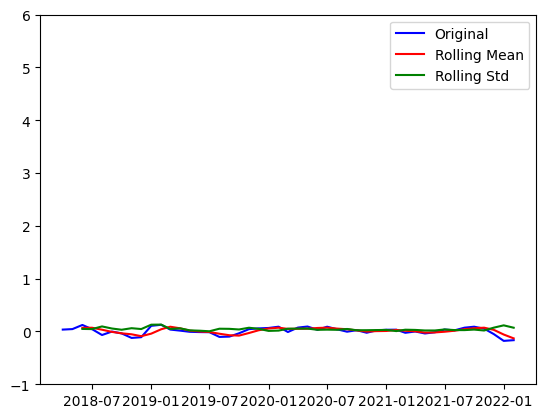

In [ ]:
plt.plot(diff_df,color = 'blue',label = 'Original')
plt.plot(roll_mean_diff,color = 'red',label = 'Rolling Mean')
plt.plot(roll_std_diff,color = 'green',label = 'Rolling Std')
plt.ylim(-1,6) #setting the log limits to compare with the previous graph for flat lines
plt.legend()
plt.show()

In [ ]:
#ADF
result = adfuller(diff_df)
pv = result[1]
pv

np.float64(0.002388806844898642)

In [ ]:
if pv > 0.05:
  print('Data is not Stationary')
else:
  print('Data is stationary')

Data is stationary


#Splitting the data

In [ ]:
diff_df

,Final_Price
Month,
2018-04-01,0.035664
2018-05-01,0.045126
2018-06-01,0.123292
2018-07-01,0.044524
2018-08-01,-0.066924
2018-09-01,-0.001502
2018-10-01,-0.036560
2018-11-01,-0.122246
2018-12-01,-0.108262


In [ ]:
diff_df.shape

(47,)

In [ ]:
type(diff_df)

pandas.core.series.Series

In [ ]:
diff_df = pd.DataFrame(diff_df)

In [ ]:
diff_df

,Final_Price
Month,
2018-04-01,0.035664
2018-05-01,0.045126
2018-06-01,0.123292
2018-07-01,0.044524
2018-08-01,-0.066924
2018-09-01,-0.001502
2018-10-01,-0.036560
2018-11-01,-0.122246
2018-12-01,-0.108262


In [ ]:
train = diff_df.iloc[:37]
test = diff_df.iloc[37:]

In [ ]:
train

,Final_Price
Month,
2018-04-01,0.035664
2018-05-01,0.045126
2018-06-01,0.123292
2018-07-01,0.044524
2018-08-01,-0.066924
2018-09-01,-0.001502
2018-10-01,-0.036560
2018-11-01,-0.122246
2018-12-01,-0.108262


#**ARIMA** - Auto Regressive Integrated Moving Average

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order=(2,1,2)) #p(past),d(diff),q(past error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
diff_df['ARIMA_Prediction'] = model.predict(start = 37,end = 48)  #test

In [ ]:
diff_df

,Final_Price,ARIMA_Prediction
Month,,
2018-04-01,0.035664,NaN
2018-05-01,0.045126,NaN
2018-06-01,0.123292,NaN
2018-07-01,0.044524,NaN
2018-08-01,-0.066924,NaN
2018-09-01,-0.001502,NaN
2018-10-01,-0.036560,NaN
2018-11-01,-0.122246,NaN
2018-12-01,-0.108262,NaN


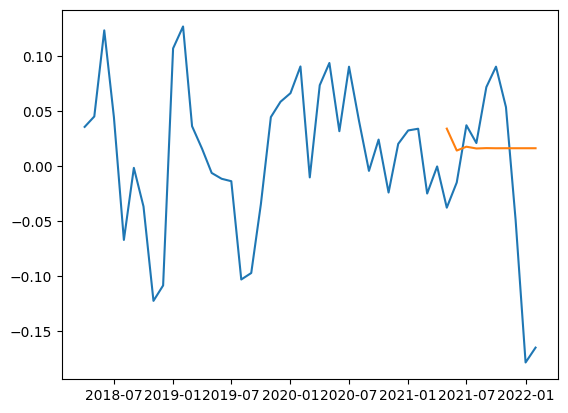

In [ ]:
plt.plot(diff_df)
plt.show()

1. Data is very random(noise)
2. Very small dataset

In [ ]:
import itertools

p = range(8)
d = range(1,2)
q = range(8)

pdq = list(itertools.product(p, d, q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [ ]:
from sklearn.metrics import mean_squared_error #evaluation metrics

In [ ]:
rmse = [] #to check the rmse score for each combination of pdq
order1 = []

for p in pdq:
  model = ARIMA(train,order = p)
  model = model.fit()
  pred = model.predict(start = 37,end = 46) #test
  error = np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(p)

result = pd.DataFrame(index = order1,data = rmse, columns = ['Order'])
result

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,Order
"(0, 1, 0)",0.089896
"(0, 1, 1)",0.089456
"(0, 1, 2)",0.095608
"(0, 1, 3)",0.095618
"(0, 1, 4)",0.095415
...,...
"(7, 1, 3)",0.094517
"(7, 1, 4)",0.097427
"(7, 1, 5)",0.096039
"(7, 1, 6)",0.092849


In [ ]:
result.sort_values(by = 'Order')

,Order
"(0, 1, 1)",0.089456
"(1, 1, 0)",0.089611
"(0, 1, 0)",0.089896
"(5, 1, 0)",0.092505
"(7, 1, 0)",0.092515
...,...
"(6, 1, 5)",0.097835
"(5, 1, 6)",0.098026
"(2, 1, 6)",0.099358
"(5, 1, 5)",0.099902


In [ ]:
model = ARIMA(train,order=(0,1,1))
model = model.fit()
diff_df['ARIMA_Prediction'] = model.predict(start = 37,end = 48)
diff_df

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Final_Price,ARIMA_Prediction
Month,,
2018-04-01,0.035664,NaN
2018-05-01,0.045126,NaN
2018-06-01,0.123292,NaN
2018-07-01,0.044524,NaN
2018-08-01,-0.066924,NaN
2018-09-01,-0.001502,NaN
2018-10-01,-0.036560,NaN
2018-11-01,-0.122246,NaN
2018-12-01,-0.108262,NaN


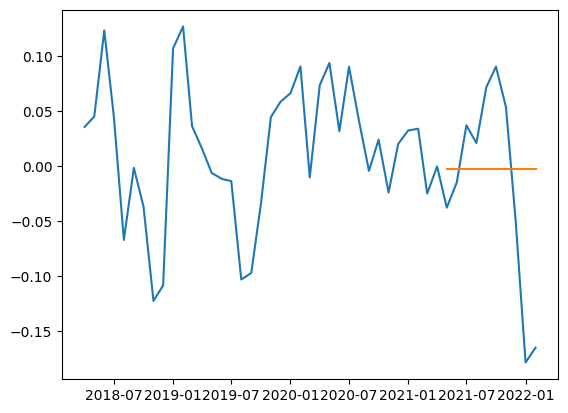

In [ ]:
plt.plot(diff_df)
plt.show()

#**SARIMAX** - Seasonal ARIMA with Exogeneous variables - Random pattern due to external factor

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
models = SARIMAX(train,order = (0,1,1),seasonal_order = (0,1,1,12)) #p,d, q, s
models = models.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
diff_df['SARIMAX_Prediction'] = models.predict(start = 37,end = 48)

In [ ]:
diff_df

,Final_Price,ARIMA_Prediction,SARIMAX_Prediction
Month,,,
2018-04-01,0.035664,NaN,NaN
2018-05-01,0.045126,NaN,NaN
2018-06-01,0.123292,NaN,NaN
2018-07-01,0.044524,NaN,NaN
2018-08-01,-0.066924,NaN,NaN
2018-09-01,-0.001502,NaN,NaN
2018-10-01,-0.036560,NaN,NaN
2018-11-01,-0.122246,NaN,NaN
2018-12-01,-0.108262,NaN,NaN


<Axes: xlabel='Month'>

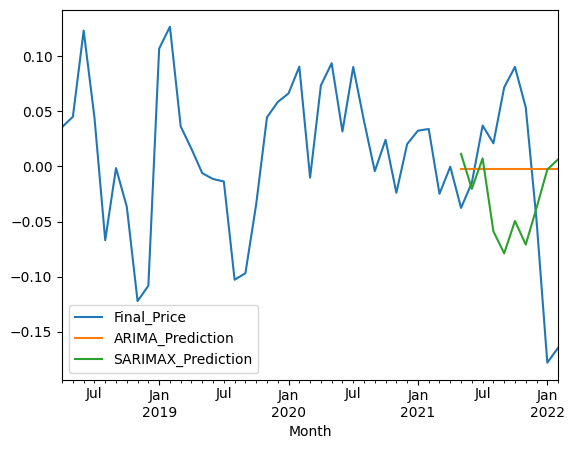

In [ ]:
diff_df.plot()

In [ ]:
forecast_log = models.forecast(steps = 12)
forecast_log

,predicted_mean
2021-05-01,0.011345
2021-06-01,-0.020338
2021-07-01,0.007281
2021-08-01,-0.058899
2021-09-01,-0.078852
2021-10-01,-0.049519
2021-11-01,-0.070929
2021-12-01,-0.037675
2022-01-01,-0.002825
2022-02-01,0.006430


In [ ]:
last_log_value = df.iloc[-1]
last_log_value

np.float64(6.053488210397576)

In [ ]:
forecast_log_new = forecast_log + 6.053488210397576
forecast_log_new #reversing the differencing

,predicted_mean
2021-05-01,6.064833
2021-06-01,6.033150
2021-07-01,6.060769
2021-08-01,5.994589
2021-09-01,5.974636
2021-10-01,6.003970
2021-11-01,5.982559
2021-12-01,6.015814
2022-01-01,6.050663
2022-02-01,6.059919


In [ ]:
actual = np.exp(forecast_log_new)
actual

,predicted_mean
2021-05-01,430.450776
2021-06-01,417.026505
2021-07-01,428.705196
2021-08-01,401.251782
2021-09-01,393.324808
2021-10-01,405.033444
2021-11-01,396.453776
2021-12-01,409.859195
2022-01-01,424.394339
2022-02-01,428.340583


In [ ]:
df

,Final_Price
Month,
2018-02-01,5.606003
2018-03-01,5.743734
2018-04-01,5.728365
2018-05-01,5.803739
2018-06-01,5.950990
2018-07-01,5.944151
2018-08-01,5.847184
2018-09-01,5.893415
2018-10-01,5.815460


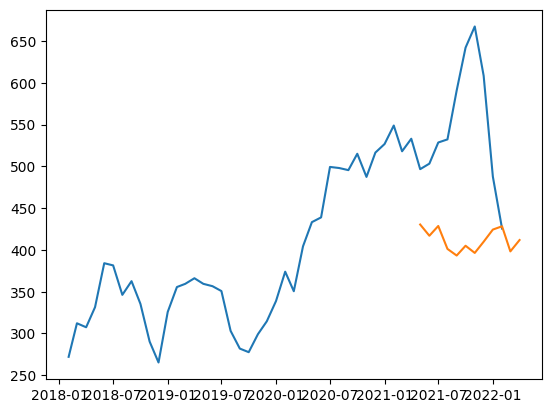

In [ ]:
plt.plot(data)
plt.plot(actual)
plt.show()